Linear Regression

In [1]:
import pandas as pd

DATASET_PATH = "dataset.json"

btc_price_history = pd.read_json(DATASET_PATH)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

interval = '1m'

timestamps = pd.to_datetime(btc_price_history[interval]["ct"], unit='ms')
closing_prices = btc_price_history[interval]["c"]

X = timestamps.values.astype(int).reshape(-1, 1)
y = closing_prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

linear_regressor = LinearRegression()

linear_regressor.fit(X_train, y_train)

y_pred = linear_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")

Mean Squared Error (MSE): 257006444.1802954
Root Mean Squared Error (RMSE): 16031.420529082736
R-squared (R²): -1.2732039458285271e-06


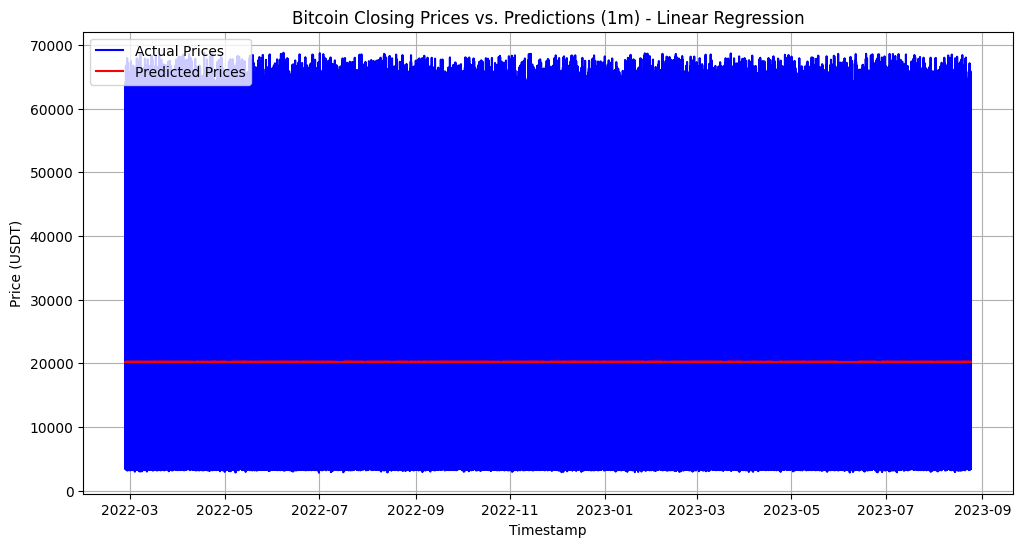

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(timestamps[-len(y_test):], y_test, label="Actual Prices", color='blue')
plt.plot(timestamps[-len(y_test):], y_pred, label="Predicted Prices", color='red')
plt.xlabel("Timestamp")
plt.ylabel("Price (USDT)")
plt.title(f"Bitcoin Closing Prices vs. Predictions ({interval}) - Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import datetime

oct_10_2023 = datetime.datetime(2023, 10, 10)

epoch = oct_10_2023.timestamp() * 1000

In [5]:
linear_regressor.predict([[epoch]])

array([18015.95770808])